In [1]:
%load_ext PWE_NB_Extension

In [2]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.visualize import PWEVisualization
from PW_explorer.helper import pw_slicer
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
import networkx as nx

In [3]:
%clingo -l "property-ID-V/ex1.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --display_input --donot-display_output -exp ex1

Input:


'prop(o1, red).\nprop(o1, box).\nprop(o1, large).\n\nprop(o2, green).\nprop(o2, box).\nprop(o2, large).\n\nprop(o3, red).\nprop(o3, box).\nprop(o3, large).\n\nprop(o4, red).\nprop(o4, box).\nprop(o4, large).\n\n\n% Mapping DB facts to graph edges:\ne(t(X,Y), X) :- prop(X,Y).\ne(t(X,Y), Y) :- prop(X,Y).\n% A graph automorphism is a bijection m: V -> V,\n% s.t. e(X,Y) <=> e( f(X), f(Y) ) for all X,Y in V.\n\n% Final all VERTICES (the edges e/2 come from a separate file):\nv(X) :- e(X,_).\nv(X) :- e(_,X).\n\n% For any pair of vertices X,Y, there is 0 or 1 map atom m(X,Y):\n0 { m(X,Y) } 1 :- v(X), v(Y).\n\n% X1--e-->X2 is mapped to Y1--e-->Y2 whenever X1--m-->Y1 and X2-->m-->Y2\n:- e(X1,X2), m(X1,Y1), m(X2,Y2), not e(Y1,Y2).\n% ... and vice versa:\n:- e(Y1,Y2), m(X1,Y1), m(X2,Y2), not e(X1,X2).\n\n% Each vertex X is source and sink of exactly one m-arc:\n:- v(X), #count {Y: m(X,Y)} != 1.\n:- v(X), #count {Y: m(Y,X)} != 1.\n\n%#show m/2.'

In [4]:
%%clingo -l "property-ID-V/ex1.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --donot-display_input

#show m/2.

Output:


'Answer: 1\nm(t(o1,red),t(o1,red)) m(t(o1,large),t(o1,box)) m(t(o1,box),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o3,red),t(o3,red)) m(t(o3,large),t(o3,box)) m(t(o3,box),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,large),t(o4,box)) m(t(o4,box),t(o4,large)) m(o1,o1) m(o2,o2) m(o3,o3) m(o4,o4) m(red,red) m(large,box) m(box,large) m(green,green)\nAnswer: 2\nm(t(o3,red),t(o1,red)) m(t(o3,large),t(o1,box)) m(t(o3,box),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o1,red),t(o3,red)) m(t(o1,large),t(o3,box)) m(t(o1,box),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,large),t(o4,box)) m(t(o4,box),t(o4,large)) m(o3,o1) m(o2,o2) m(o1,o3) m(o4,o4) m(red,red) m(large,box) m(box,large) m(green,green)\nAnswer: 3\nm(t(o4,red),t(o1,red)) m(t(o4,large),t(o1,box)) m(t(o4,box),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o3,red),t(o3,red)) m(t(o3,large),t(o3,box)) m(t(o3,box),t(o3,large)) m(t(o1,red),t(o4,red)) m(t(o1,large),t(o4,box)) m(t(o1,box),t(o4,large)) m(o4,o1) m(o2,o2) m(o3,o3) m(o1,o4) m(red,red) m(large,box) m(box,large) m(green,green)\nAnswer: 4\nm(t(o4,red),t(o1,red)) m(t(o4,large),t(o1,box)) m(t(o4,box),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o1,red),t(o3,red)) m(t(o1,large),t(o3,box)) m(t(o1,box),t(o3,large)) m(t(o3,red),t(o4,red)) m(t(o3,large),t(o4,box)) m(t(o3,box),t(o4,large)) m(o4,o1) m(o2,o2) m(o1,o3) m(o3,o4) m(red,red) m(large,box) m(box,large) m(green,green)\nAnswer: 5\nm(t(o1,red),t(o1,red)) m(t(o1,large),t(o1,box)) m(t(o1,box),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o4,red),t(o3,red)) m(t(o4,large),t(o3,box)) m(t(o4,box),t(o3,large)) m(t(o3,red),t(o4,red)) m(t(o3,large),t(o4,box)) m(t(o3,box),t(o4,large)) m(o1,o1) m(o2,o2) m(o4,o3) m(o3,o4) m(red,red) m(large,box) m(box,large) m(green,green)\nAnswer: 6\nm(t(o3,red),t(o1,red)) m(t(o3,large),t(o1,box)) m(t(o3,box),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o4,red),t(o3,red)) m(t(o4,large),t(o3,box)) m(t(o4,box),t(o3,large)) m(t(o1,red),t(o4,red)) m(t(o1,large),t(o4,box)) m(t(o1,box),t(o4,large)) m(o3,o1) m(o2,o2) m(o4,o3) m(o1,o4) m(red,red) m(large,box) m(box,large) m(green,green)\nAnswer: 7\nm(t(o4,red),t(o1,red)) m(t(o4,box),t(o1,box)) m(t(o4,large),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o1,red),t(o3,red)) m(t(o1,box),t(o3,box)) m(t(o1,large),t(o3,large)) m(t(o3,red),t(o4,red)) m(t(o3,box),t(o4,box)) m(t(o3,large),t(o4,large)) m(o4,o1) m(o2,o2) m(o1,o3) m(o3,o4) m(red,red) m(box,box) m(large,large) m(green,green)\nAnswer: 8\nm(t(o4,red),t(o1,red)) m(t(o4,box),t(o1,box)) m(t(o4,large),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o3,red),t(o3,red)) m(t(o3,box),t(o3,box)) m(t(o3,large),t(o3,large)) m(t(o1,red),t(o4,red)) m(t(o1,box),t(o4,box)) m(t(o1,large),t(o4,large)) m(o4,o1) m(o2,o2) m(o3,o3) m(o1,o4) m(red,red) m(box,box) m(large,large) m(green,green)\nAnswer: 9\nm(t(o3,red),t(o1,red)) m(t(o3,box),t(o1,box)) m(t(o3,large),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o4,red),t(o3,red)) m(t(o4,box),t(o3,box)) m(t(o4,large),t(o3,large)) m(t(o1,red),t(o4,red)) m(t(o1,box),t(o4,box)) m(t(o1,large),t(o4,large)) m(o3,o1) m(o2,o2) m(o4,o3) m(o1,o4) m(red,red) m(box,box) m(large,large) m(green,green)\nAnswer: 10\nm(t(o3,red),t(o1,red)) m(t(o3,box),t(o1,box)) m(t(o3,large),t(o1,large)) m(t(o2,green),t(o2,green)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o1,red),t(o3,red)) m(t(o1,box),t(o3,box)) m(t(o1,large),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,box),t(o4,box)) m(t(o4,large),t(o4,large)) m(o3,o1) m(o2,o2) m(o1,o3) m(o4,o4) m(red,red) m(box,box) m(large,large) m(green,green)\nAnswer: 11\nm(t(o1,red),t(o1,red)) m(t

In [5]:
%clingo -l "property-ID-V/ex2.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --display_input --donot-display_output -exp ex2

Input:


'prop(o1, red).\nprop(o1, box).\nprop(o1, large).\n\nprop(o2, blue).\nprop(o2, box).\nprop(o2, large).\n\nprop(o3, blue).\nprop(o3, circle).\nprop(o3, large).\n\nprop(o4, red).\nprop(o4, box).\nprop(o4, large).\n\n\n% Mapping DB facts to graph edges:\ne(t(X,Y), X) :- prop(X,Y).\ne(t(X,Y), Y) :- prop(X,Y).\n% A graph automorphism is a bijection m: V -> V,\n% s.t. e(X,Y) <=> e( f(X), f(Y) ) for all X,Y in V.\n\n% Final all VERTICES (the edges e/2 come from a separate file):\nv(X) :- e(X,_).\nv(X) :- e(_,X).\n\n% For any pair of vertices X,Y, there is 0 or 1 map atom m(X,Y):\n0 { m(X,Y) } 1 :- v(X), v(Y).\n\n% X1--e-->X2 is mapped to Y1--e-->Y2 whenever X1--m-->Y1 and X2-->m-->Y2\n:- e(X1,X2), m(X1,Y1), m(X2,Y2), not e(Y1,Y2).\n% ... and vice versa:\n:- e(Y1,Y2), m(X1,Y1), m(X2,Y2), not e(X1,X2).\n\n% Each vertex X is source and sink of exactly one m-arc:\n:- v(X), #count {Y: m(X,Y)} != 1.\n:- v(X), #count {Y: m(Y,X)} != 1.\n\n%#show m/2.'

In [6]:
%%clingo -l "property-ID-V/ex2.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --donot-display_input

#show m/2.

Output:


'Answer: 1\nm(t(o4,red),t(o1,red)) m(t(o4,box),t(o1,box)) m(t(o4,large),t(o1,large)) m(t(o2,blue),t(o2,blue)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o3,blue),t(o3,blue)) m(t(o3,circle),t(o3,circle)) m(t(o3,large),t(o3,large)) m(t(o1,red),t(o4,red)) m(t(o1,box),t(o4,box)) m(t(o1,large),t(o4,large)) m(o4,o1) m(o2,o2) m(o3,o3) m(o1,o4) m(red,red) m(box,box) m(large,large) m(blue,blue) m(circle,circle)\nAnswer: 2\nm(t(o1,red),t(o1,red)) m(t(o1,box),t(o1,box)) m(t(o1,large),t(o1,large)) m(t(o2,blue),t(o2,blue)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o3,blue),t(o3,blue)) m(t(o3,circle),t(o3,circle)) m(t(o3,large),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,box),t(o4,box)) m(t(o4,large),t(o4,large)) m(o1,o1) m(o2,o2) m(o3,o3) m(o4,o4) m(red,red) m(box,box) m(large,large) m(blue,blue) m(circle,circle)\nSATISFIABLE\n\nModels       : 2\nCalls        : 1\nTime         : 0.034s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.034s'

In [7]:
%clingo -l "property-ID-V/ex3.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --display_input --donot-display_output -exp ex3

Input:


'prop(o1, red).\nprop(o1, box).\nprop(o1, small).\n\nprop(o2, blue).\nprop(o2, box).\nprop(o2, large).\n\nprop(o3, blue).\nprop(o3, circle).\nprop(o3, large).\n\nprop(o4, red).\nprop(o4, box).\nprop(o4, large).\n\n\n\n% Mapping DB facts to graph edges:\ne(t(X,Y), X) :- prop(X,Y).\ne(t(X,Y), Y) :- prop(X,Y).\n% A graph automorphism is a bijection m: V -> V,\n% s.t. e(X,Y) <=> e( f(X), f(Y) ) for all X,Y in V.\n\n% Final all VERTICES (the edges e/2 come from a separate file):\nv(X) :- e(X,_).\nv(X) :- e(_,X).\n\n% For any pair of vertices X,Y, there is 0 or 1 map atom m(X,Y):\n0 { m(X,Y) } 1 :- v(X), v(Y).\n\n% X1--e-->X2 is mapped to Y1--e-->Y2 whenever X1--m-->Y1 and X2-->m-->Y2\n:- e(X1,X2), m(X1,Y1), m(X2,Y2), not e(Y1,Y2).\n% ... and vice versa:\n:- e(Y1,Y2), m(X1,Y1), m(X2,Y2), not e(X1,X2).\n\n% Each vertex X is source and sink of exactly one m-arc:\n:- v(X), #count {Y: m(X,Y)} != 1.\n:- v(X), #count {Y: m(Y,X)} != 1.\n\n%#show m/2.'

In [8]:
%%clingo -l "property-ID-V/ex3.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --donot-display_input

#show m/2.

Output:


'Answer: 1\nm(t(o3,blue),t(o1,red)) m(t(o3,large),t(o1,box)) m(t(o3,circle),t(o1,small)) m(t(o4,red),t(o2,blue)) m(t(o4,large),t(o2,box)) m(t(o4,box),t(o2,large)) m(t(o1,red),t(o3,blue)) m(t(o1,small),t(o3,circle)) m(t(o1,box),t(o3,large)) m(t(o2,blue),t(o4,red)) m(t(o2,large),t(o4,box)) m(t(o2,box),t(o4,large)) m(o3,o1) m(o4,o2) m(o1,o3) m(o2,o4) m(blue,red) m(large,box) m(circle,small) m(red,blue) m(box,large) m(small,circle)\nAnswer: 2\nm(t(o1,red),t(o1,red)) m(t(o1,box),t(o1,box)) m(t(o1,small),t(o1,small)) m(t(o2,blue),t(o2,blue)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o3,blue),t(o3,blue)) m(t(o3,circle),t(o3,circle)) m(t(o3,large),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,box),t(o4,box)) m(t(o4,large),t(o4,large)) m(o1,o1) m(o2,o2) m(o3,o3) m(o4,o4) m(red,red) m(box,box) m(small,small) m(blue,blue) m(large,large) m(circle,circle)\nSATISFIABLE\n\nModels       : 2\nCalls        : 1\nTime         : 0.044s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.044s'

In [9]:
%clingo -l "property-ID-V/ex4.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --display_input --donot-display_output -exp ex4

Input:


'prop(o1, blue).\nprop(o1, large).\nprop(o1, circle).\n\nprop(o2, red).\nprop(o2, large).\nprop(o2, box).\n\nprop(o3, red).\nprop(o3, small).\nprop(o3, box).\n\nprop(o4, blue).\nprop(o4, large).\nprop(o4, box).\n\n\n\n% Mapping DB facts to graph edges:\ne(t(X,Y), X) :- prop(X,Y).\ne(t(X,Y), Y) :- prop(X,Y).\n% A graph automorphism is a bijection m: V -> V,\n% s.t. e(X,Y) <=> e( f(X), f(Y) ) for all X,Y in V.\n\n% Final all VERTICES (the edges e/2 come from a separate file):\nv(X) :- e(X,_).\nv(X) :- e(_,X).\n\n% For any pair of vertices X,Y, there is 0 or 1 map atom m(X,Y):\n0 { m(X,Y) } 1 :- v(X), v(Y).\n\n% X1--e-->X2 is mapped to Y1--e-->Y2 whenever X1--m-->Y1 and X2-->m-->Y2\n:- e(X1,X2), m(X1,Y1), m(X2,Y2), not e(Y1,Y2).\n% ... and vice versa:\n:- e(Y1,Y2), m(X1,Y1), m(X2,Y2), not e(X1,X2).\n\n% Each vertex X is source and sink of exactly one m-arc:\n:- v(X), #count {Y: m(X,Y)} != 1.\n:- v(X), #count {Y: m(Y,X)} != 1.\n\n%#show m/2.'

In [10]:
%%clingo -l "property-ID-V/ex4.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --donot-display_input

#show m/2.

Output:


'Answer: 1\nm(t(o3,red),t(o1,blue)) m(t(o3,box),t(o1,large)) m(t(o3,small),t(o1,circle)) m(t(o4,blue),t(o2,red)) m(t(o4,box),t(o2,large)) m(t(o4,large),t(o2,box)) m(t(o1,blue),t(o3,red)) m(t(o1,circle),t(o3,small)) m(t(o1,large),t(o3,box)) m(t(o2,red),t(o4,blue)) m(t(o2,box),t(o4,large)) m(t(o2,large),t(o4,box)) m(o3,o1) m(o4,o2) m(o1,o3) m(o2,o4) m(red,blue) m(box,large) m(small,circle) m(blue,red) m(large,box) m(circle,small)\nAnswer: 2\nm(t(o1,blue),t(o1,blue)) m(t(o1,large),t(o1,large)) m(t(o1,circle),t(o1,circle)) m(t(o2,red),t(o2,red)) m(t(o2,large),t(o2,large)) m(t(o2,box),t(o2,box)) m(t(o3,red),t(o3,red)) m(t(o3,small),t(o3,small)) m(t(o3,box),t(o3,box)) m(t(o4,blue),t(o4,blue)) m(t(o4,large),t(o4,large)) m(t(o4,box),t(o4,box)) m(o1,o1) m(o2,o2) m(o3,o3) m(o4,o4) m(blue,blue) m(large,large) m(circle,circle) m(red,red) m(box,box) m(small,small)\nSATISFIABLE\n\nModels       : 2\nCalls        : 1\nTime         : 0.040s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.040s'

In [11]:
%clingo -l "property-ID-V/ex5.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --display_input --donot-display_output -exp ex5

Input:


'prop(o1, red).\nprop(o1, box).\nprop(o1, small).\n\nprop(o2, green).\nprop(o2, box).\nprop(o2, large).\n\nprop(o3, red).\nprop(o3, circle).\nprop(o3, large).\n\nprop(o4, red).\nprop(o4, box).\nprop(o4, large).\n\n\n\n\n% Mapping DB facts to graph edges:\ne(t(X,Y), X) :- prop(X,Y).\ne(t(X,Y), Y) :- prop(X,Y).\n% A graph automorphism is a bijection m: V -> V,\n% s.t. e(X,Y) <=> e( f(X), f(Y) ) for all X,Y in V.\n\n% Final all VERTICES (the edges e/2 come from a separate file):\nv(X) :- e(X,_).\nv(X) :- e(_,X).\n\n% For any pair of vertices X,Y, there is 0 or 1 map atom m(X,Y):\n0 { m(X,Y) } 1 :- v(X), v(Y).\n\n% X1--e-->X2 is mapped to Y1--e-->Y2 whenever X1--m-->Y1 and X2-->m-->Y2\n:- e(X1,X2), m(X1,Y1), m(X2,Y2), not e(Y1,Y2).\n% ... and vice versa:\n:- e(Y1,Y2), m(X1,Y1), m(X2,Y2), not e(X1,X2).\n\n% Each vertex X is source and sink of exactly one m-arc:\n:- v(X), #count {Y: m(X,Y)} != 1.\n:- v(X), #count {Y: m(Y,X)} != 1.\n\n%#show m/2.'

In [12]:
%%clingo -l "property-ID-V/ex5.pl" "property-ID-V/db2edges.pl" "property-ID-V/automorphism.pl" --donot-display_input

#show m/2.

Output:


'Answer: 1\nm(t(o3,red),t(o1,red)) m(t(o3,large),t(o1,box)) m(t(o3,circle),t(o1,small)) m(t(o2,green),t(o2,green)) m(t(o2,large),t(o2,box)) m(t(o2,box),t(o2,large)) m(t(o1,red),t(o3,red)) m(t(o1,small),t(o3,circle)) m(t(o1,box),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,large),t(o4,box)) m(t(o4,box),t(o4,large)) m(o3,o1) m(o2,o2) m(o1,o3) m(o4,o4) m(red,red) m(large,box) m(circle,small) m(green,green) m(box,large) m(small,circle)\nAnswer: 2\nm(t(o3,large),t(o1,red)) m(t(o3,red),t(o1,box)) m(t(o3,circle),t(o1,small)) m(t(o1,small),t(o2,green)) m(t(o1,red),t(o2,box)) m(t(o1,box),t(o2,large)) m(t(o2,large),t(o3,red)) m(t(o2,green),t(o3,circle)) m(t(o2,box),t(o3,large)) m(t(o4,large),t(o4,red)) m(t(o4,red),t(o4,box)) m(t(o4,box),t(o4,large)) m(o3,o1) m(o1,o2) m(o2,o3) m(o4,o4) m(large,red) m(red,box) m(circle,small) m(small,green) m(box,large) m(green,circle)\nAnswer: 3\nm(t(o2,large),t(o1,red)) m(t(o2,box),t(o1,box)) m(t(o2,green),t(o1,small)) m(t(o1,small),t(o2,green)) m(t(o1,box),t(o2,box)) m(t(o1,red),t(o2,large)) m(t(o3,large),t(o3,red)) m(t(o3,circle),t(o3,circle)) m(t(o3,red),t(o3,large)) m(t(o4,large),t(o4,red)) m(t(o4,box),t(o4,box)) m(t(o4,red),t(o4,large)) m(o2,o1) m(o1,o2) m(o3,o3) m(o4,o4) m(large,red) m(box,box) m(green,small) m(small,green) m(red,large) m(circle,circle)\nAnswer: 4\nm(t(o1,box),t(o1,red)) m(t(o1,red),t(o1,box)) m(t(o1,small),t(o1,small)) m(t(o3,circle),t(o2,green)) m(t(o3,red),t(o2,box)) m(t(o3,large),t(o2,large)) m(t(o2,box),t(o3,red)) m(t(o2,green),t(o3,circle)) m(t(o2,large),t(o3,large)) m(t(o4,box),t(o4,red)) m(t(o4,red),t(o4,box)) m(t(o4,large),t(o4,large)) m(o1,o1) m(o3,o2) m(o2,o3) m(o4,o4) m(box,red) m(red,box) m(small,small) m(circle,green) m(large,large) m(green,circle)\nAnswer: 5\nm(t(o1,red),t(o1,red)) m(t(o1,box),t(o1,box)) m(t(o1,small),t(o1,small)) m(t(o2,green),t(o2,green)) m(t(o2,box),t(o2,box)) m(t(o2,large),t(o2,large)) m(t(o3,red),t(o3,red)) m(t(o3,circle),t(o3,circle)) m(t(o3,large),t(o3,large)) m(t(o4,red),t(o4,red)) m(t(o4,box),t(o4,box)) m(t(o4,large),t(o4,large)) m(o1,o1) m(o2,o2) m(o3,o3) m(o4,o4) m(red,red) m(box,box) m(small,small) m(green,green) m(large,large) m(circle,circle)\nAnswer: 6\nm(t(o2,box),t(o1,red)) m(t(o2,large),t(o1,box)) m(t(o2,green),t(o1,small)) m(t(o3,circle),t(o2,green)) m(t(o3,large),t(o2,box)) m(t(o3,red),t(o2,large)) m(t(o1,box),t(o3,red)) m(t(o1,small),t(o3,circle)) m(t(o1,red),t(o3,large)) m(t(o4,box),t(o4,red)) m(t(o4,large),t(o4,box)) m(t(o4,red),t(o4,large)) m(o2,o1) m(o3,o2) m(o1,o3) m(o4,o4) m(box,red) m(large,box) m(green,small) m(circle,green) m(red,large) m(small,circle)\nSATISFIABLE\n\nModels       : 6\nCalls        : 1\nTime         : 0.041s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.041s'

### Optional
Visualizing automorphisms:

In [13]:
exps = [ex1, ex2, ex3, ex4, ex5]
for ex in exps:
    ex['pw_rel_dfs'], ex['rel_schemas'], ex['pw_objs'] = load_worlds(ex['asp_soln'], ex['meta_data'], internal_facts_as_string=False)

Number of Models: 12
Number of Models: 2
Number of Models: 2
Number of Models: 2
Number of Models: 6


In [14]:
ex1['pw_rel_dfs']['m_2']

,pw,x1,x2
0,1,"[t, o1, red]","[t, o1, red]"
1,1,"[t, o1, large]","[t, o1, box]"
2,1,"[t, o1, box]","[t, o1, large]"
3,1,"[t, o2, green]","[t, o2, green]"
4,1,"[t, o2, large]","[t, o2, box]"
...,...,...,...
235,12,o3,o4
236,12,red,red
237,12,box,box
238,12,large,large


In [29]:
def automorphism_viz(pw_rel_dfs, show_fig_automorphisms=False):
    g = nx.DiGraph()
    g.graph['rankdir'] = 'LR'
    g.add_node('M1', shape='oval', style="filled", fillcolor="#CCFFCC", fontname="Helvetica")
    g.add_node('M2', shape='oval', style="filled", fillcolor="#FFFFCC", fontname="Helvetica")
    fids = set([])
    
    for i, row in pw_rel_dfs['prop_2'].iterrows():
        fid, val = row['x1'], row['x2']
        g.add_node(f'{fid}_1', label=fid, shape='oval', style="filled", fillcolor="#CCFFCC", fontname="Helvetica")
        g.add_node(f'{val}_1', label=val, shape='oval', fontname="Helvetica")
        g.add_node(f'{fid}_2', label=fid, shape='oval', style="filled", fillcolor="#FFFFCC", fontname="Helvetica")
        g.add_node(f'{val}_2', label=val, shape='oval', fontname="Helvetica")
        g.add_edge('M1', f'{fid}_1', dir='none', constraint="true", penwidth="1")
        g.add_edge(f'{fid}_2', 'M2', dir='none', constraint="true", penwidth="1")
        g.add_edge(f'{fid}_1', f'{val}_1', dir='none', constraint="true")
        g.add_edge(f'{val}_2', f'{fid}_2', dir='none', constraint="true")
        fids.add(fid)
    
    for i, row in pw_rel_dfs['m_2'].iterrows():
        v1, v2 = row['x1'], row['x2']
        if isinstance(v1, list) or isinstance(v2, list):
            continue
        if v1 in fids:
            if show_fig_automorphisms:
                if (f'{v2}_1', f'{v1}_2') in g.edges or v1 == v2:
                    g.add_edge(f'{v1}_1', f'{v2}_2', style="dashed", color="blue", constraint="false", penwidth="1", dir='both')
                    g.add_edge(f'{v2}_1', f'{v1}_2', style="dashed", color="blue", constraint="false", penwidth="1", dir='both')
                else:
                    g.add_edge(f'{v1}_1', f'{v2}_2', style="dashed", color="blue", constraint="false", penwidth="1")
                    g.add_edge(f'{v2}_1', f'{v1}_2', style="dashed", color="blue", constraint="false", penwidth="1", dir='back')
        else:
            if (f'{v2}_1', f'{v1}_2') in g.edges or v1 == v2:
                g.add_edge(f'{v1}_1', f'{v2}_2', style="dashed", color="#AA00FF", constraint="true", penwidth="2", dir='both')
                g.add_edge(f'{v2}_1', f'{v1}_2', style="dashed", color="#AA00FF", constraint="true", penwidth="2", dir='both')
            else:
                g.add_edge(f'{v1}_1', f'{v2}_2', style="dashed", color="#AA00FF", constraint="true", penwidth="2")
                g.add_edge(f'{v2}_1', f'{v1}_2', style="dashed", color="#AA00FF", constraint="true", penwidth="2", dir='back')
    
    return g

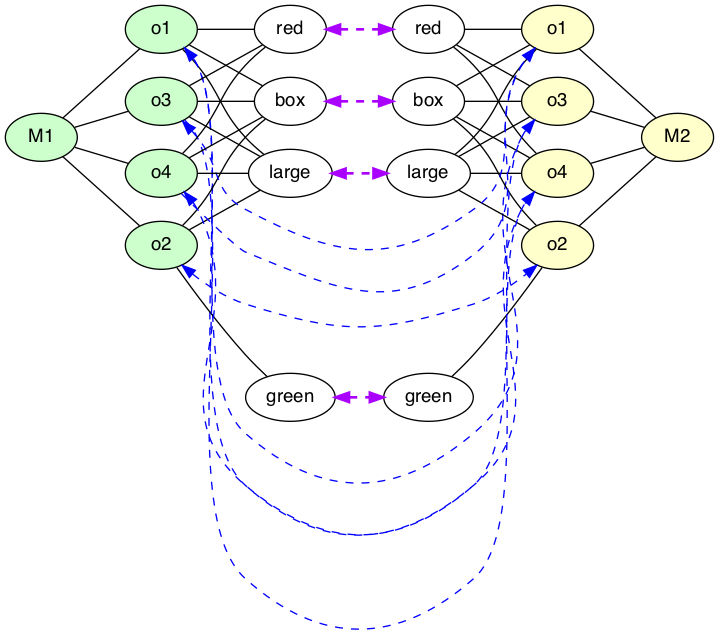

In [30]:
ex = ex1
pw_id = 7
pw_rel_dfs = pw_slicer(ex['pw_rel_dfs'], None, [pw_id])[0]
draw(automorphism_viz(pw_rel_dfs, True))

----------------------------------------------------------------------------------------------------
ex1:
PW-1:


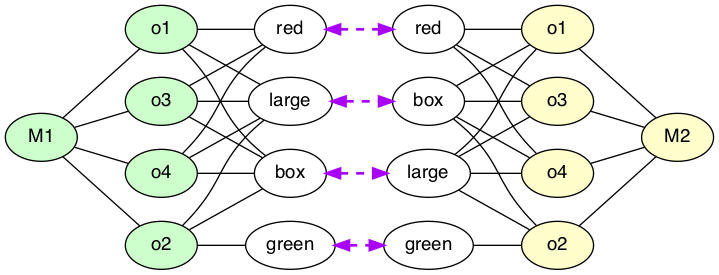

PW-2:


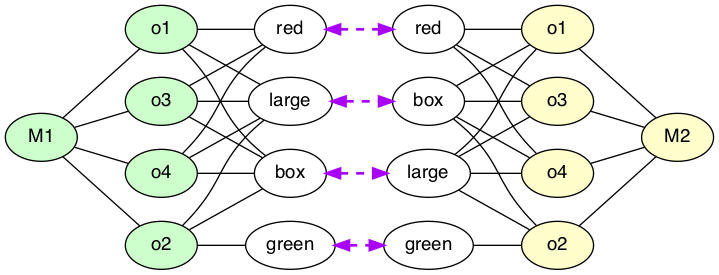

PW-3:


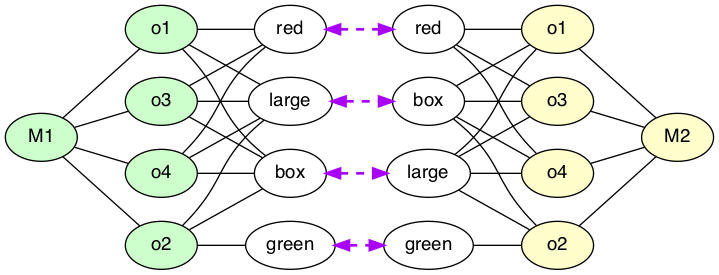

PW-4:


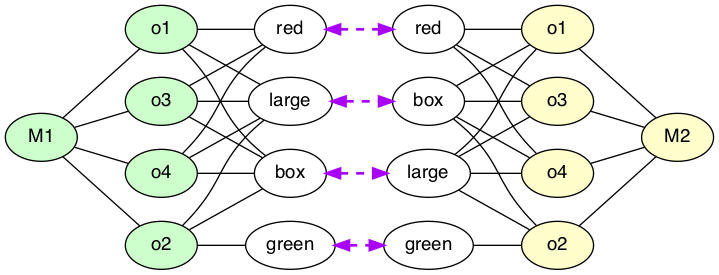

PW-5:


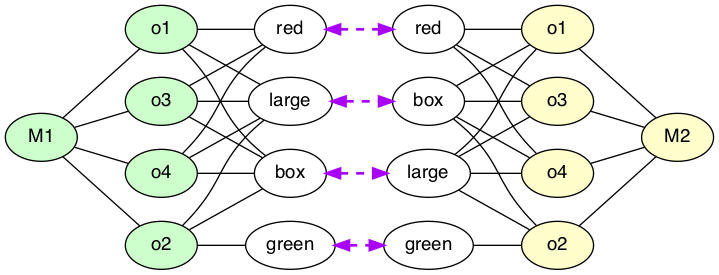

PW-6:


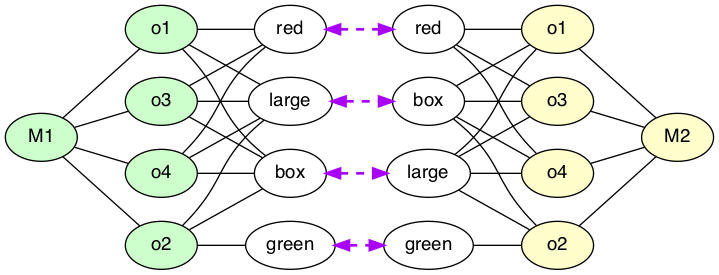

PW-7:


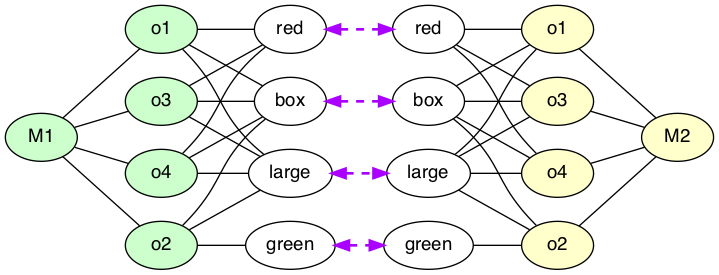

PW-8:


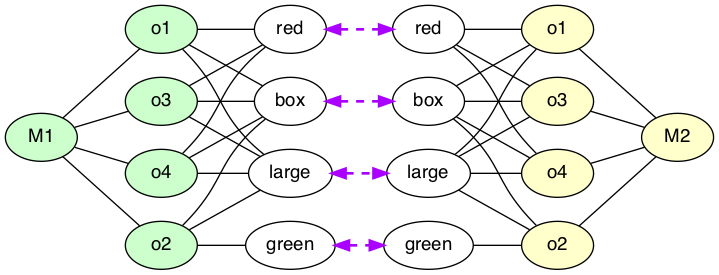

PW-9:


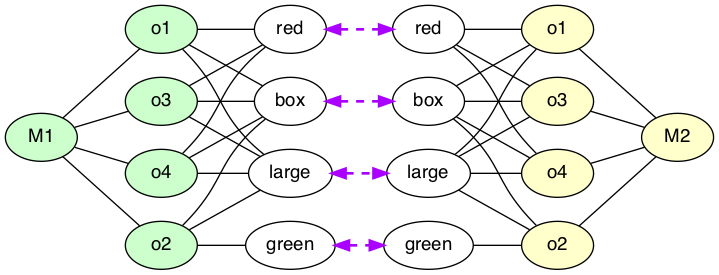

PW-10:


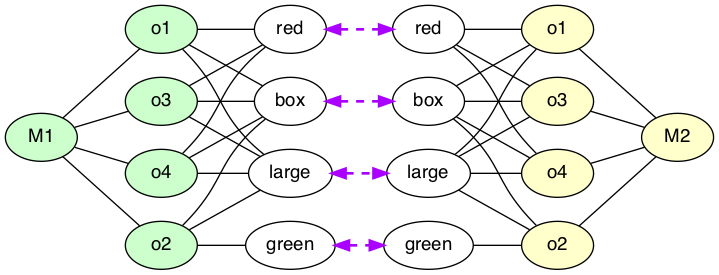

PW-11:


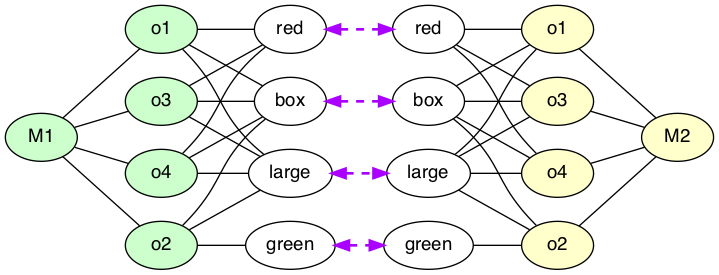

PW-12:


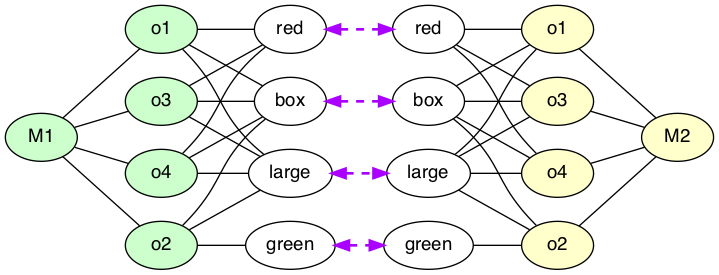

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
ex2:
PW-1:


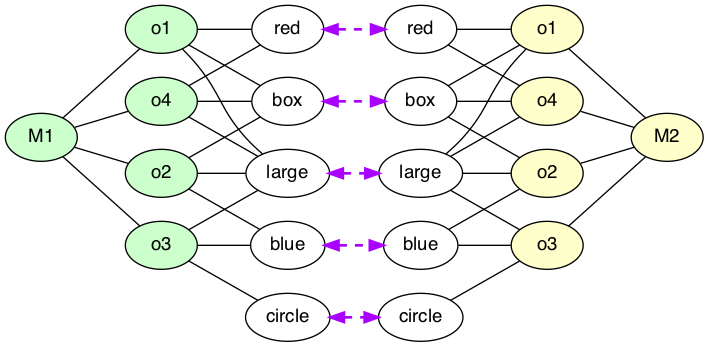

PW-2:


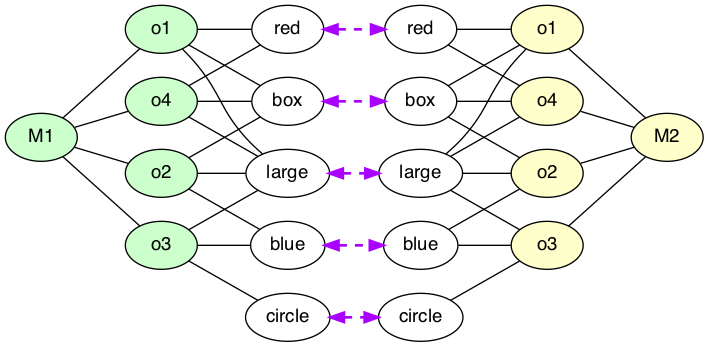

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
ex3:
PW-1:


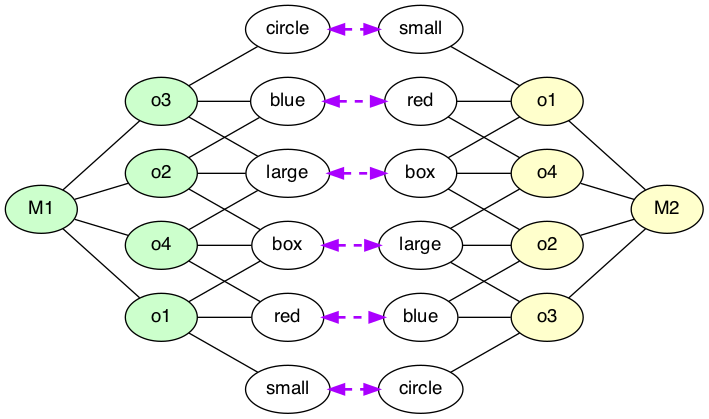

PW-2:


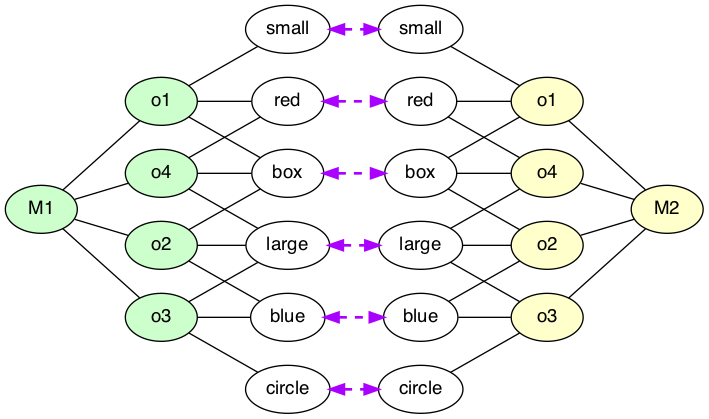

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
ex4:
PW-1:


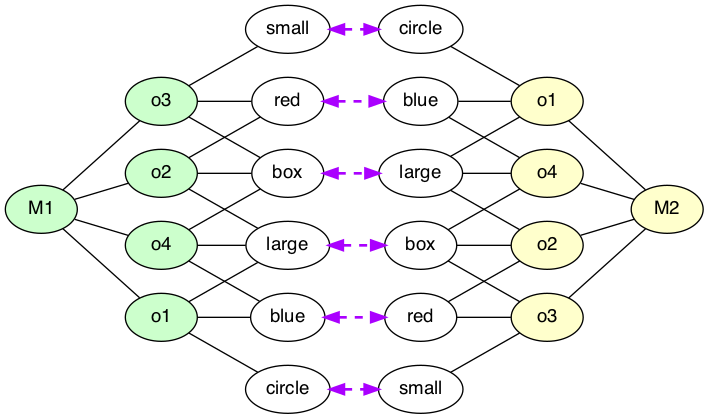

PW-2:


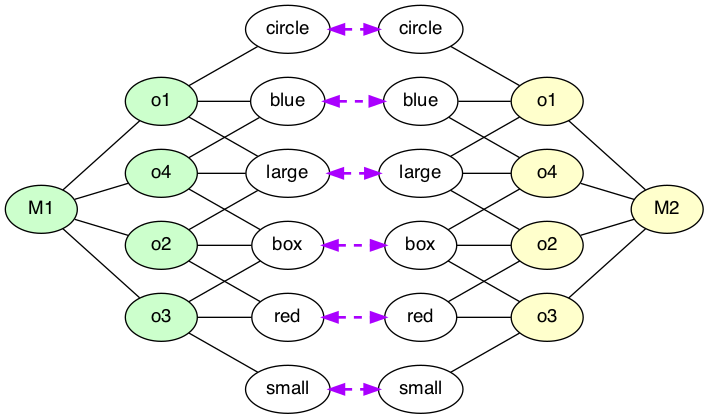

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
ex5:
PW-1:


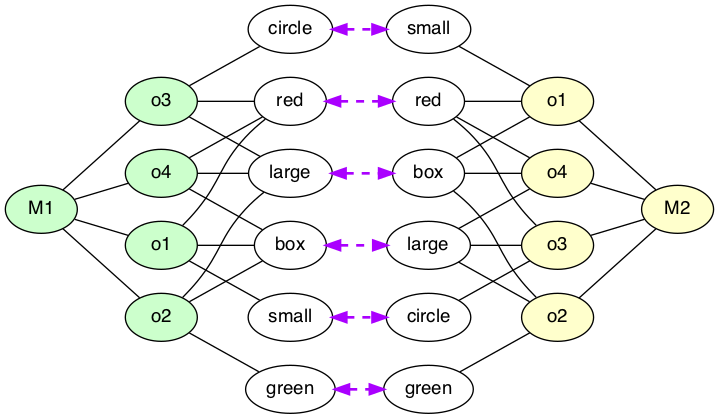

PW-2:


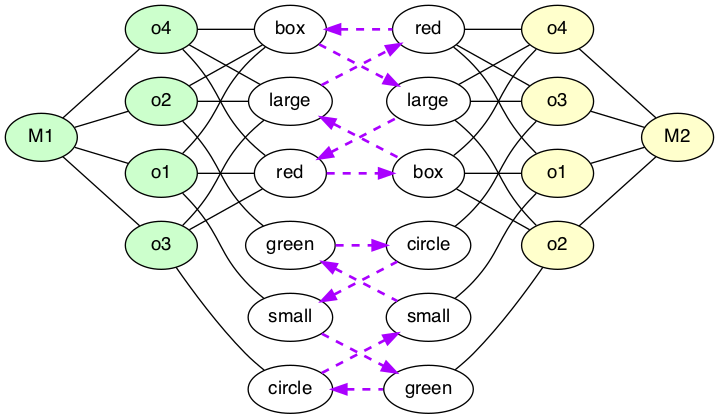

PW-3:


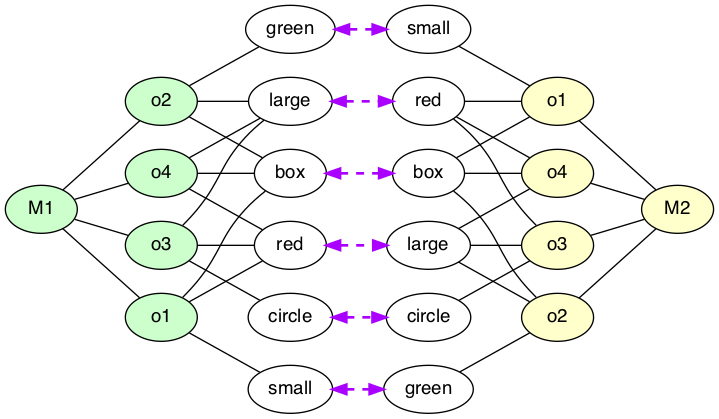

PW-4:


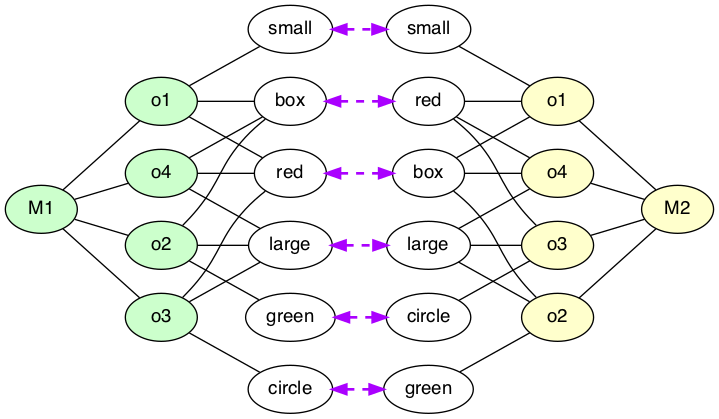

PW-5:


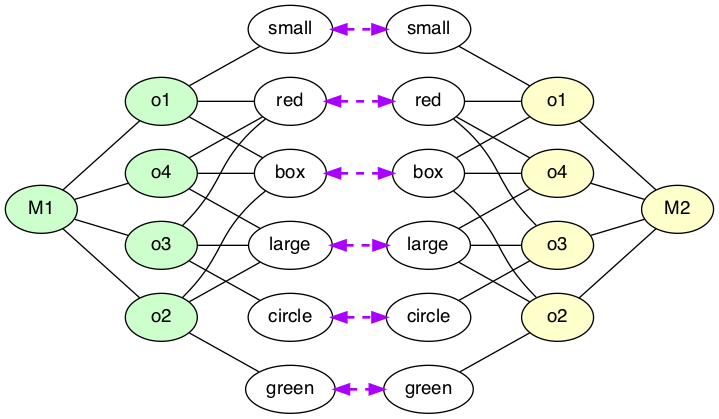

PW-6:


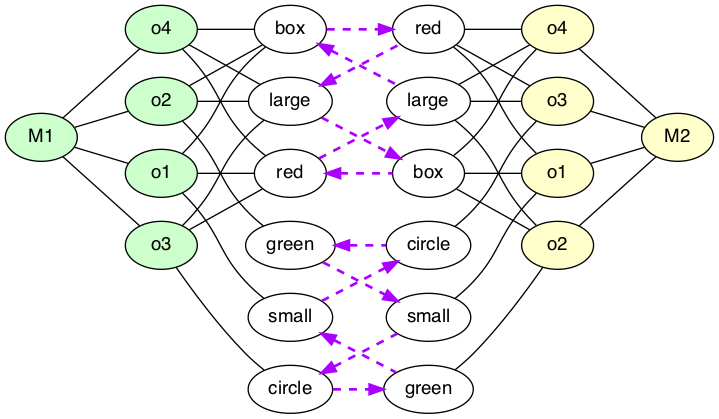

----------------------------------------------------------------------------------------------------


In [17]:
for i, ex in enumerate(exps):
    print('-'*100)
    print(f'ex{i+1}:')
    for pw_id in range(1, len(ex['pw_objs'])+1):
        print(f'PW-{pw_id}:')
        pw_rel_dfs = pw_slicer(ex['pw_rel_dfs'], None, [pw_id])[0]
        display(draw(automorphism_viz(pw_rel_dfs)))
    print('-'*100)